Importing

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Loading Dataset

In [131]:
data = pd.read_csv("movie_revenue - Movie_Revenue.csv")

EDA

In [132]:
data.head()

,Movie_ID,Marketing_Spend_Cr,Star_Power,Genre,Budget_Cr,Screens,Social_Media_Buzz,IMDB_Rating,Competition,Box_Office_Revenue_Cr
0,1,33.106857,7,Drama,14.890417,2248,29731,5.006819,High,108.275482
1,2,27.992011,4,Comedy,73.812188,1131,44922,5.293104,High,81.992953
2,3,5.262351,8,Comedy,59.946757,944,45848,4.823532,Low,11.274974
3,4,21.014207,7,Horror,31.045263,186,4390,5.651075,Low,83.316156
4,5,19.261737,5,Drama,12.544840,2190,6997,7.783758,Low,160.426849


In [133]:
data.shape


(200, 10)

In [134]:
data.isnull().sum()

Movie_ID                 0
Marketing_Spend_Cr       0
Star_Power               0
Genre                    0
Budget_Cr                0
Screens                  0
Social_Media_Buzz        0
IMDB_Rating              0
Competition              0
Box_Office_Revenue_Cr    0
dtype: int64

In [135]:
data.duplicated().sum()

np.int64(0)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie_ID               200 non-null    int64  
 1   Marketing_Spend_Cr     200 non-null    float64
 2   Star_Power             200 non-null    int64  
 3   Genre                  200 non-null    object 
 4   Budget_Cr              200 non-null    float64
 5   Screens                200 non-null    int64  
 6   Social_Media_Buzz      200 non-null    int64  
 7   IMDB_Rating            200 non-null    float64
 8   Competition            200 non-null    object 
 9   Box_Office_Revenue_Cr  200 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 15.8+ KB


In [137]:
data.describe()

,Movie_ID,Marketing_Spend_Cr,Star_Power,Budget_Cr,Screens,Social_Media_Buzz,IMDB_Rating,Box_Office_Revenue_Cr
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,25.477250,4.875000,52.008956,1603.495000,24232.750000,6.651887,103.896464
std,57.879185,14.460752,2.617946,27.753952,817.558395,14387.841337,1.442926,55.285740
min,1.000000,1.312908,1.000000,6.047970,122.000000,1097.000000,4.062020,10.440334
25%,50.750000,12.155260,2.000000,27.268910,879.750000,11200.500000,5.405751,54.638842
50%,100.500000,27.126507,5.000000,51.797219,1670.000000,23552.500000,6.718605,107.863471
75%,150.250000,37.951061,7.000000,76.771897,2319.500000,35163.500000,7.977061,149.326208
max,200.000000,49.859101,9.000000,99.686201,2983.000000,49998.000000,8.977188,199.945623


In [138]:
numeric_cols = ['Marketing_Spend_Cr', 'Budget_Cr', 'Screens', 
                'Social_Media_Buzz', 'IMDB_Rating', 'Box_Office_Revenue_Cr']

Visualization

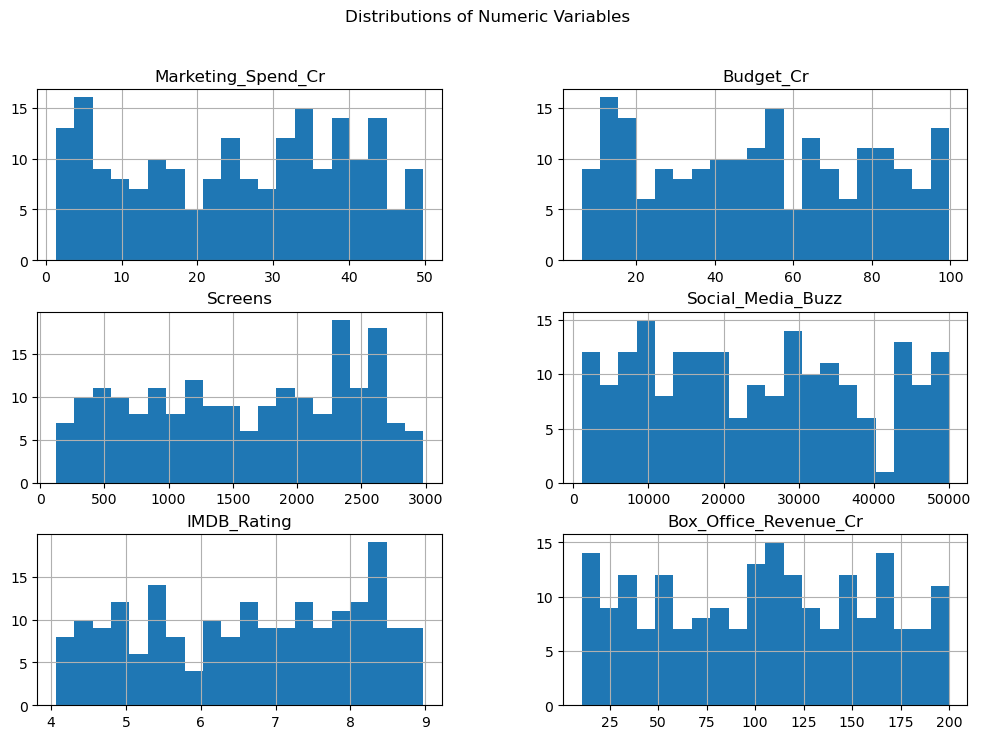

In [139]:
data[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Distributions of Numeric Variables")
plt.show()

Simple Linear Regression

In [ ]:
X = data[['Marketing_Spend_Cr']]  
y = data['Box_Office_Revenue_Cr']   

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

marketing_budget = 10
predicted_revenue = model.predict([[marketing_budget]])
print(f"Predicted Revenue for ₹{marketing_budget} Cr marketing spend: ₹{predicted_revenue[0]:.2f} Cr")

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")



Predicted Revenue for ₹10 Cr marketing spend: ₹97.65 Cr
R² Score: 0.011
RMSE: 54.839


c:\Users\HP\anaconda3\anaconda34\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


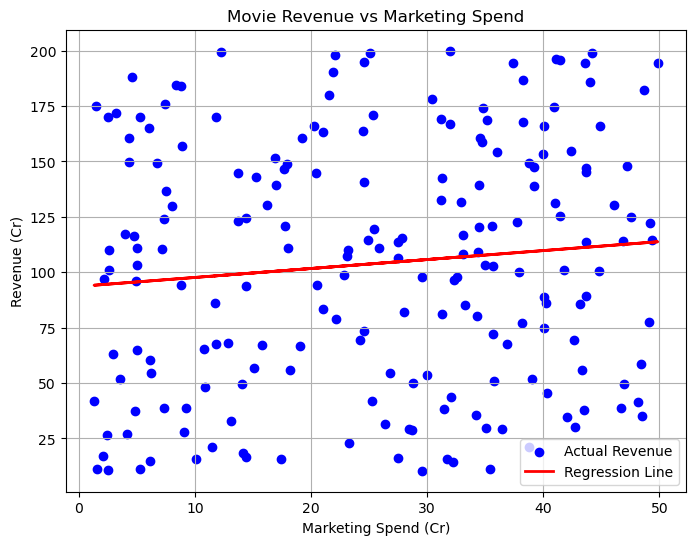

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Actual Revenue")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")

plt.xlabel("Marketing Spend (Cr)")
plt.ylabel("Revenue (Cr)")
plt.title("Movie Revenue vs Marketing Spend")
plt.legend()
plt.grid(True)
plt.show()

Multiple Linear Regression

In [142]:
X = data[["Marketing_Spend_Cr", "Star_Power", "Screens"]]  
y = data["Box_Office_Revenue_Cr"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.016
RMSE: 54.711
